#**This is a basic tutorial on how to build a Least Squares Regression Line given a timeseries using python.**


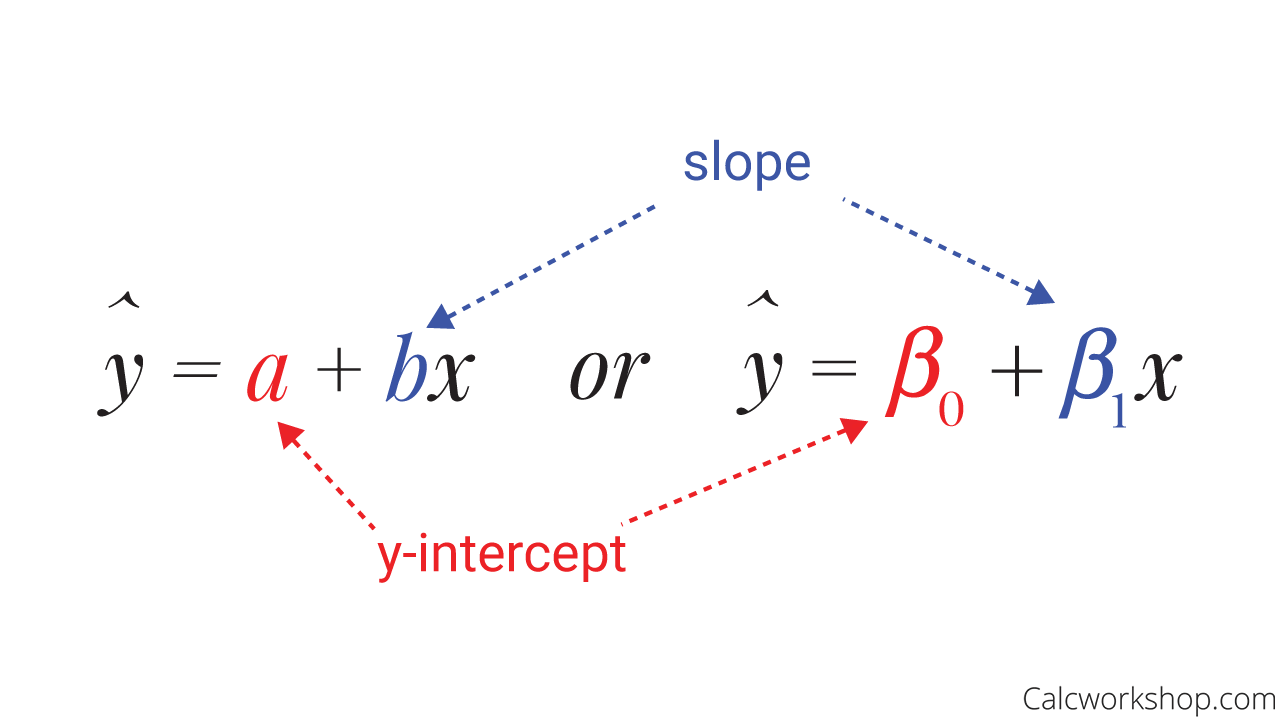

In [17]:
import math

def getSTD(series):
  """
  Helper method to calculate standard deviation given a dataset
  """
  average = sum(series) / len(series)
  result = 0
  for value in series:
    squaredDistanceFromMean = (value - average) ** 2
    result += squaredDistanceFromMean
  result /= len(series) - 1
  return math.sqrt(result)

In [14]:
def getCC(x, y):
  """
  Helper method to calculate correlation coefficient given a dataset
  """
  if len(x) != len(y):
    return -1
  xSTD = getSTD(x)
  ySTD = getSTD(y)
  xAv = sum(x) / len(x)
  yAv = sum(y) / len(y)
  result = 0
  for i in range(len(x)):
    result += ((x[i] - xAv) / xSTD) * ((y[i] - yAv) / ySTD)
  result *= (1 / (len(x) - 1))
  return result

In [15]:
### Set x and y coordinates in timeseries fashion, with y being random values, and x being the consecutive time
### series indexes
y = [47, 12, 85, 63, 29, 56, 41, 17, 94, 72]
x = [1,2,3,4,5,6, 7, 8, 9, 10]

### Calculate averages of x and y, this is reduntant in this example as this is done automatically by the getSTD
### method, however I am still including it
xAv = sum(x) / len(x)
yAv = sum(y) / len(y)

### Calculate coorelation coefficient, this is necessary to calculate slope
r = getCC(x, y)

### Find estimate for slope
xSTD = getSTD(x)
ySTD = getSTD(y)
slope = r * (ySTD / xSTD)

### Find estimate for intercept
intercept = yAv - (slope * xAv)

### Once slope and intercept are calculated, we have the equation for our line: y = (slope * x) + intercept

### Build equation for line and store data points on the line
regressionLine = []
for i in x:
  point = (slope * i) + intercept
  regressionLine.append(point)

print(regressionLine)

[40.14545454545455, 42.690909090909095, 45.236363636363635, 47.78181818181818, 50.32727272727273, 52.872727272727275, 55.41818181818182, 57.96363636363637, 60.509090909090915, 63.054545454545455]


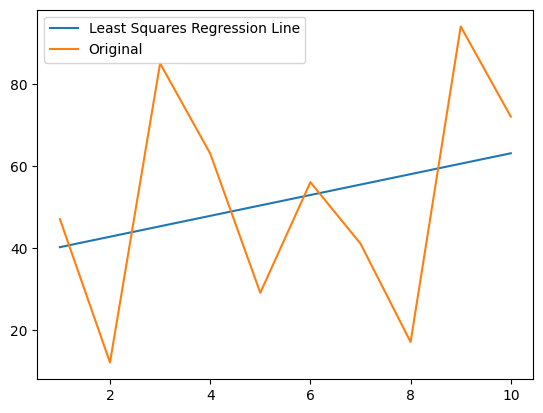

In [16]:
import matplotlib.pyplot as plt

### Finally, Graph the regression line in relation to the established x axis
plt.plot(x, regressionLine, label="Least Squares Regression Line")
plt.plot(x, y, label='Original')
plt.legend()
plt.show()